In this tutorial, we will use random forest regression to approximate an image by learning a function, that takes image (x, y) coordinates as input and outputs pixel brightness. This way, the function learns to approximate areas of the image that it has not seen before.

# a  
Start with an image of the Mona Lisa. If you don’t like the Mona Lisa, pick another interesting image of your choice. http://tinyurl.com/mona-lisa-small
![Mona Lisa](monalisa.png)

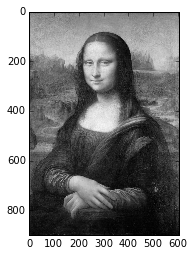

In [1]:
import urllib, cStringIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Read image into img variable and convert it to grayscale
URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg/604px-Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg"
file = cStringIO.StringIO(urllib.urlopen(URL).read())
img = Image.open(file).convert('L')

# Convert image to grayscale
img = np.asarray(img)

plt.imshow(img, cmap = cm.Greys_r)
plt.show()

# b  
Preprocessing the input. To build our "trainingset,” we will uniformly sample 5,000 random (x,y)coor-dinate locations.  

• What other preprocessing steps are necessary for random forests inputs? Describe them, implement them, and justify your decisions. In particular, do you need to perform mean subtraction, standardization, or unit-normalization?


**Answer:** Decision trees don't care about the structure of our data. They don't require us to scale variables, mean subtract them or unit normalize them. They just work.

So I didn't need to perform any of those preprocessing steps.

/Users/halilakin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/halilakin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/halilakin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


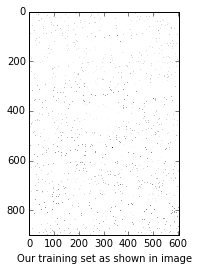

In [3]:
trainingX = np.zeros((5000,2))
trainingY = np.zeros((5000,1))
trainingY2 = []

for i in range(5000):
    trainingX[i,0] = np.random.randint(img.shape[0])
    trainingX[i,1] = np.random.randint(img.shape[1])
    trainingY[i,0] = img[trainingX[i,0],trainingX[i,1]]
    trainingY2.append(img[trainingX[i,0],trainingX[i,1]])
    
# Create a white image
sampledImage =  np.zeros((img.shape[0],img.shape[1]))
sampledImage[:][:]=255

for i in range(5000):
    sampledImage[trainingX[i,0]][trainingX[i,1]]=trainingY[i,0]

plt.imshow(sampledImage, cmap = cm.Greys_r,vmin=0,vmax=255)
plt.xlabel('Our training set as shown in image')
plt.show()

Let's get more information about image and check if training set is randomly distributed

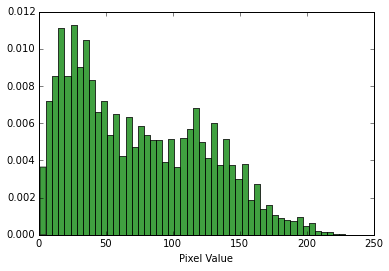

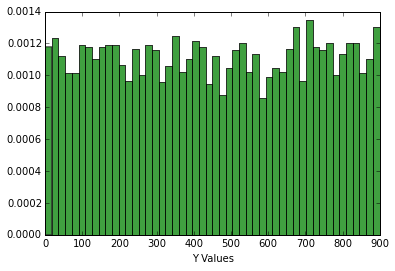

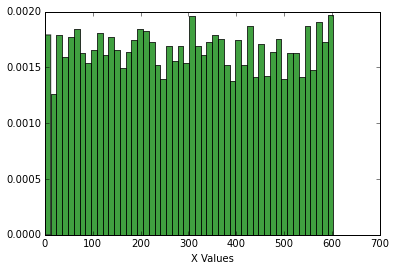

In [5]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the pixel values
plt.figure(1)
n, bins, patches = plt.hist(trainingY, 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Pixel Value')

# the histogram of the X values (training X)
plt.figure(2)
n, bins, patches = plt.hist(trainingX[:,0], 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('Y Values')

# the histogram of the Y values (training Y)
plt.figure(3)
n, bins, patches = plt.hist(trainingX[:,1], 50, normed=1, facecolor='g', alpha=0.75)
plt.xlabel('X Values')


Indeed, the training coordinations are randomly distributed and seem uniform

# c  
Preprocessing the output. Sample pixel values at each of the given coordinate locations. Each pixel contains red, green, and blue intensity values, so decide how you want to handle this. There are several options available to you:  

• Convert the image to grayscale (Done)  
• Regress all three values at once, so your function maps (x,y) coordinates to (r,g,b) values:
f : R2 → R3  
• Learn a different function for each channel, fRed :R2 →R,and like wise for fGreen, fBlue.

**Answer:** I converted the images to grayscale so that it's going to be easier to work with them. Since we have grayscale we don't need to perform any postprocessing on the data. 

# d   
Rescale the pixel intensities to lie between 0.0 and 1.0. (The default for pixel values may be be- tween 0 and 255, but your image library may have different defaults.)

**Answer:** I did this below, however this step is not necessary for grayscale images. 

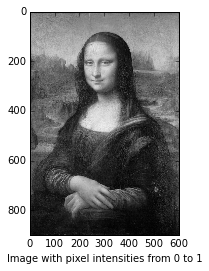

In [6]:
imgZerosOnes =  np.zeros((img.shape[0],img.shape[1]))

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        imgZerosOnes[i][j] = float(img[i][j])/256

plt.imshow(imgZerosOnes, cmap = cm.Greys_r,vmin=0,vmax=1)
plt.xlabel('Image with pixel intensities from 0 to 1')
plt.show()

# e  
What other preprocessing steps are necessary for random regression forest outputs? Describe them, implement them, and justify your decisions

**Answer:** None

# f  
To build the final image,for each pixel of the output,feed the pixel coordinate through the random forest and color the resulting pixel with the output prediction. You can then use imshow to view the result. (If you are using grayscale, try imshow(Y, cmap=’gray’) to avoid fake-coloring). You may use any implementation of random forests, but you should understand the implementation and you must cite your sources.

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score

def predictImage(img,estimator):
    predictedImg = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            predictedImg[i,j] = estimator.predict([i,j])
    return predictedImg

estimator = RandomForestRegressor(random_state=0, n_estimators=1)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()



# g. Experimentation.  
(a) Repeat the experiment for a random forest containing a single decisiontree,but with depths 1, 2, 3, 5, 10, and 15. How does depth impact the result? Describe in detail why.

When we have depth 1 there is only one decision stump and the color is either gonna be close to white or black. 

As we increase the number of decision stumps further in the tree, we start having more diverse colors and more representative image.

Keep in mind that I kept the number of estimators as 1 in this example. So there is only 1 tree in our forest (Yeah, that kind of forest)

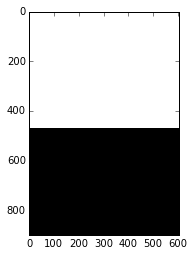

In [10]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=1)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

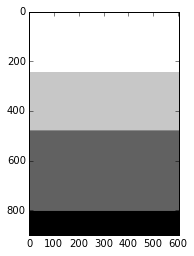

In [92]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=2)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

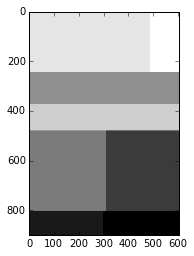

In [93]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=3)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

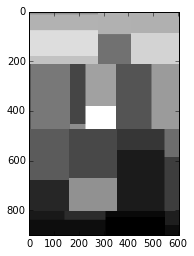

In [8]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=5)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

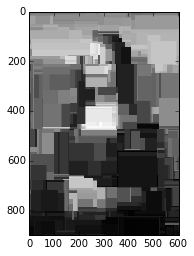

In [9]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=10)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

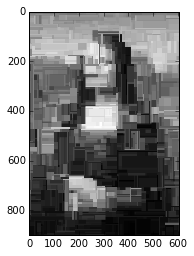

In [10]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=15)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

(b) Repeat the experiment for a random forest of depth 7,but with number of trees equal to 1,3, 5, 10, and 100. How does the number of trees impact the result? Describe in detail why.

When we increase the number of trees, for each tree it takes a subset of inputs(bagging) and generate a new tree with different features(random forests). This further decorrelates learners and increases the prediction power.

So as we increase the number of trees, we are going to be able to make better predictions at granuler level, that's why the image looks less contrasted and more smooth.


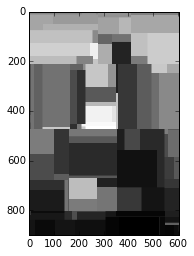

In [11]:
estimator = RandomForestRegressor(random_state=0, n_estimators=1, max_depth=7)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

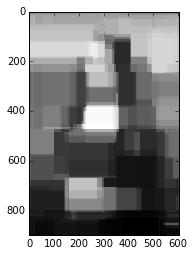

In [12]:
estimator = RandomForestRegressor(random_state=0, n_estimators=3, max_depth=7)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

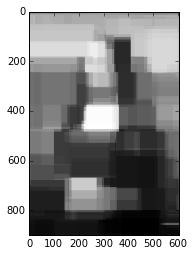

In [13]:
estimator = RandomForestRegressor(random_state=0, n_estimators=5, max_depth=7)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

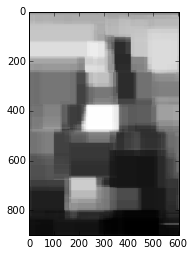

In [ ]:
estimator = RandomForestRegressor(random_state=0, n_estimators=10, max_depth=7)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

In [ ]:
estimator = RandomForestRegressor(random_state=0, n_estimators=100, max_depth=7)
ourEstimator = estimator.fit(trainingX, trainingY2)

predictedImg = predictImage(img,estimator)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

(c) As a simple baseline, repeat the experiment using a k-NN regressor, for k = 1. This means that every pixel in the output will equal the nearest pixel from the “training set.” Compare and contrast the outlook: why does this look the way it does?

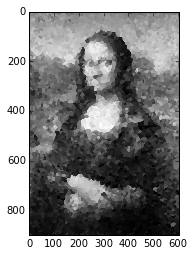

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(trainingX, trainingY2) 

predictedImg = predictImage(img,neigh)
plt.imshow(predictedImg, cmap = cm.Greys_r)
plt.show()

(d) Experiment with different pruning strategies of your choice.

We do pruning to get rid of overfitting and complexity of model. However, random forest trees don't need pruning if the number of variables is large (5000 in our case) according to the Hastie's books. I checked the book and he says that there might be some cases random forests trees can overfit, however, for our case, we don't need pruning.

# h. Analysis.

**(a) What is the decision rule at each split point? Write down the 1-line formula for the split point at the root node for one the trained decision trees inside the forest. Feel free to define any variables you need.**

The decision rule at each split point is basically a decision stump that asks a question based on the value of a variable. In our case, the question is 'Is the value of x or y bigger than or smaller than some certain value that is between 0 and 255.

Pick a splitting variable j from the coordinates of the image (height or width) and a split point s (the value of s totally depends on cost minimization), which creates 2 half planes

R_1(j,s) = {X|X_j<=s} and R_2(j,s)={X|X_j>s}

(b) Why does the resulting image look like the way it does? What shape are the patches of color, and how are they arranged?

Because at every leaf, it creates a regression function based on MSE and averages the possible value for those x and y that fall into this leaf.  So, the reason we have color patches is because we dont have further data to differentiate pixels in those areas.

(c) Easy: How many patches of color maybe in the resulting image if the forest contains a single decision tree? Define any variables you need.

2^d (d=depth)

(d) Tricky: How many patches of color might be in the resulting image if the forest contains n decision trees? Define any variables you need.

between 2^d and (n * 2^d)